<a href="https://colab.research.google.com/github/nkale882/AML_Practicals/blob/main/AML_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline


In [2]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Mall_Customers (1).csv to Mall_Customers (1).csv
User uploaded file "Mall_Customers (1).csv" with length 3981 bytes


In [7]:
df=pd.read_csv('/content/Mall_Customers (1).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#Drop Unnecessary Columns
df = df.drop(["Age", "CustomerID"], axis=1)
df.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Male,15,39
1,Male,15,81
2,Female,16,6
3,Female,16,77
4,Female,17,40


In [10]:
#Encode Categorical Feature
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male = 1, Female = 0
df.head()

,Gender,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,1,15,81
2,0,16,6
3,0,16,77
4,0,17,40


In [19]:
#Normalize the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Gender,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.000000,0.387755,1.0
1,1.0,0.000000,0.816327,0.0
2,0.0,0.008197,0.051020,1.0
3,0.0,0.008197,0.775510,0.0
4,0.0,0.016393,0.397959,1.0


In [20]:
#Dataset Description
df.describe()

,Gender,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.373443,0.502041,0.395000
std,0.497633,0.215285,0.263505,0.490077
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.217213,0.344388,0.000000
50%,0.000000,0.381148,0.500000,0.000000
75%,1.000000,0.516393,0.734694,1.000000
max,1.000000,1.000000,1.000000,1.000000


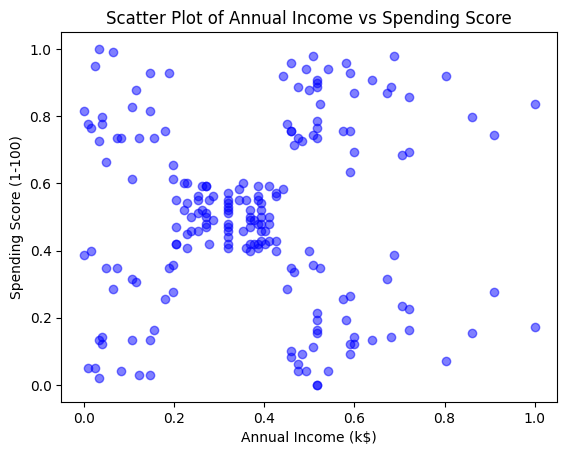

In [22]:
#Scatter Plot (Before Clustering)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='blue', alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()


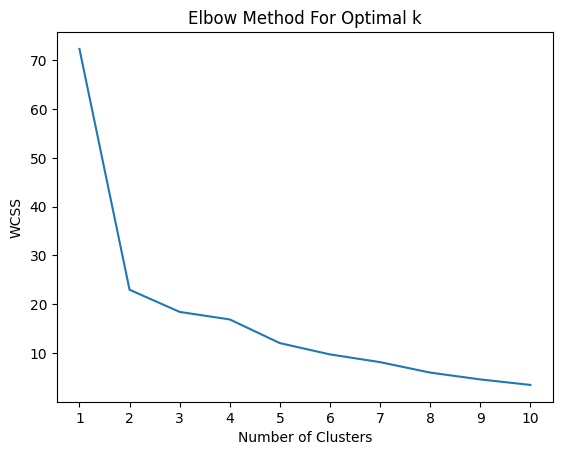

In [14]:
#Elbow Method – WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.show()


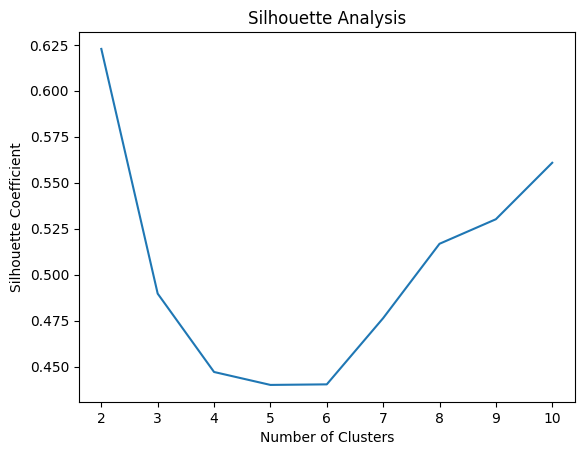

In [15]:
#Silhouette Score Analysis
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Analysis")
plt.show()


In [16]:
#Apply KMeans with Optimal k
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
print(df['Cluster'].value_counts())


Cluster
0    121
1     79
Name: count, dtype: int64


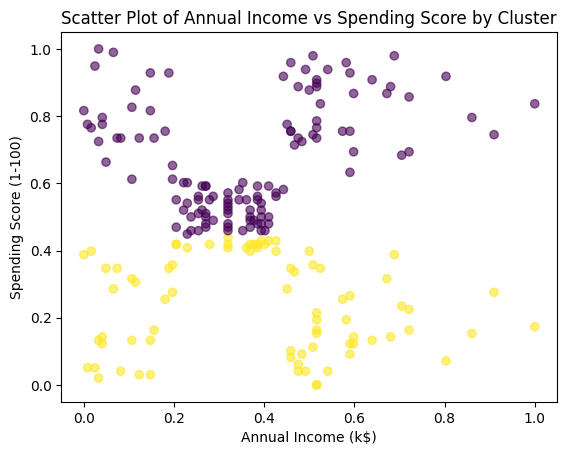

In [17]:
#Clustered Scatter Plot
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Annual Income vs Spending Score by Cluster")
plt.show()
